[Encuesta Nacional sobre Discriminación (ENADIS) 2017](http://www.beta.inegi.org.mx/proyectos/enchogares/especiales/enadis/2017/default.html)

[Missigno](https://anaconda.org/conda-forge/missingno)

In [20]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
file = '../data/conjunto_de_datos_enadis2017_csv/treligion_enadis2017/'

In [8]:
indice = pd.read_csv(filepath_or_buffer=file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 36: invalid continuation byte

In [9]:
indice = pd.read_csv(filepath_or_buffer=file, encoding='latin')

In [10]:
indice

,Encuesta Nacional sobre Discriminación ENADIS 2017,Unnamed: 1
0,\t,NaN
1,Nombre de archivo,Título de Tablas
2,conjunto_de_datos_tadolescente_enadis_2017,Adolescentes y jóvenes
3,conjunto_de_datos_tadulto_enadis_2017,Personas adultas mayores
4,conjunto_de_datos_tcoe_enadis_2017,Cuestionario de Opinión y Experiencias
5,conjunto_de_datos_tdiscapacidad_enadis_2017,Personas con discapacidad
6,conjunto_de_datos_tdiscapacidad_v_enadis_2017,Personas con discapacidad concluidas por linea...
7,conjunto_de_datos_thogar_enadis_2017,Hogares
8,conjunto_de_datos_tindigena_enadis_2017,Personas indígenas
9,conjunto_de_datos_tindigena_v_enadis_2017,Personas indígenas concluidas por lineamiento


In [11]:
file = '../data/conjunto_de_datos_enadis2017_csv/tadolescente_enadis2017/conjunto_de_datos/conjunto_de_datos_tadolescente_enadis_2017.csv'

In [12]:
df = pd.read_csv(filepath_or_buffer=file, encoding='latin')

In [13]:
df.head()

,upm,viv_sel,hogar,n_ren,pm6_1,pm6_2,pm6_3_1,pm6_3_2,pm6_3_3,pm6_3_4,...,pm8_7_7,pm8_7_8,factor_per,upm_dis,est_dis,tloc,estrato,ent,sexo,edad
0,100040,2,1,4,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,187,1,2,1,3,1,1,26
1,100040,3,1,1,3.0,2.0,2.0,2.0,1.0,1.0,...,2.0,2.0,210,1,2,1,3,1,1,26
2,100040,3,1,2,2.0,7.0,1.0,1.0,2.0,1.0,...,2.0,2.0,210,1,2,1,3,1,2,28
3,100080,1,2,2,2.0,3.0,1.0,1.0,1.0,2.0,...,2.0,2.0,183,2,2,1,3,1,2,29
4,100080,2,1,2,1.0,3.0,2.0,1.0,1.0,2.0,...,2.0,2.0,109,2,2,1,3,1,2,26


In [21]:
df.replace("nan", np.nan, inplace=True)

In [22]:
df.isnull().any().any()

True

In [27]:
missing = df.columns[df.isnull().any()].tolist()

In [24]:
len(pd.isnull(df).any(1).nonzero()[0].tolist())

36192

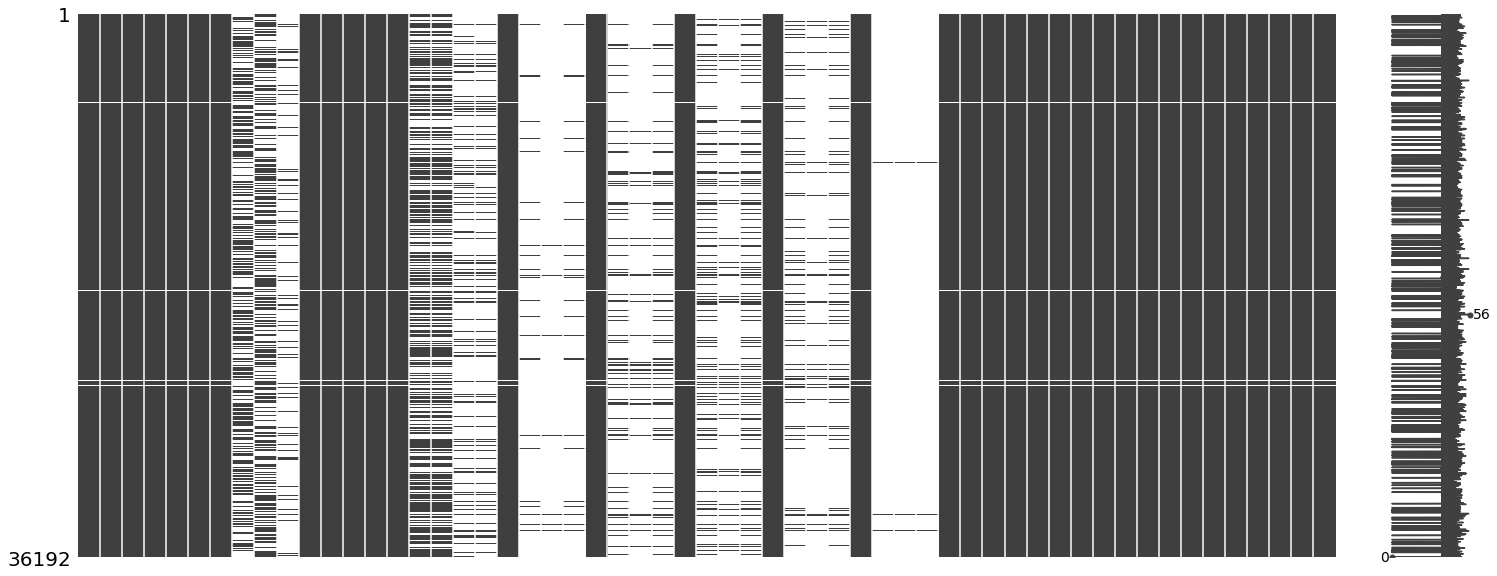

In [28]:
msno.matrix(df[missing])

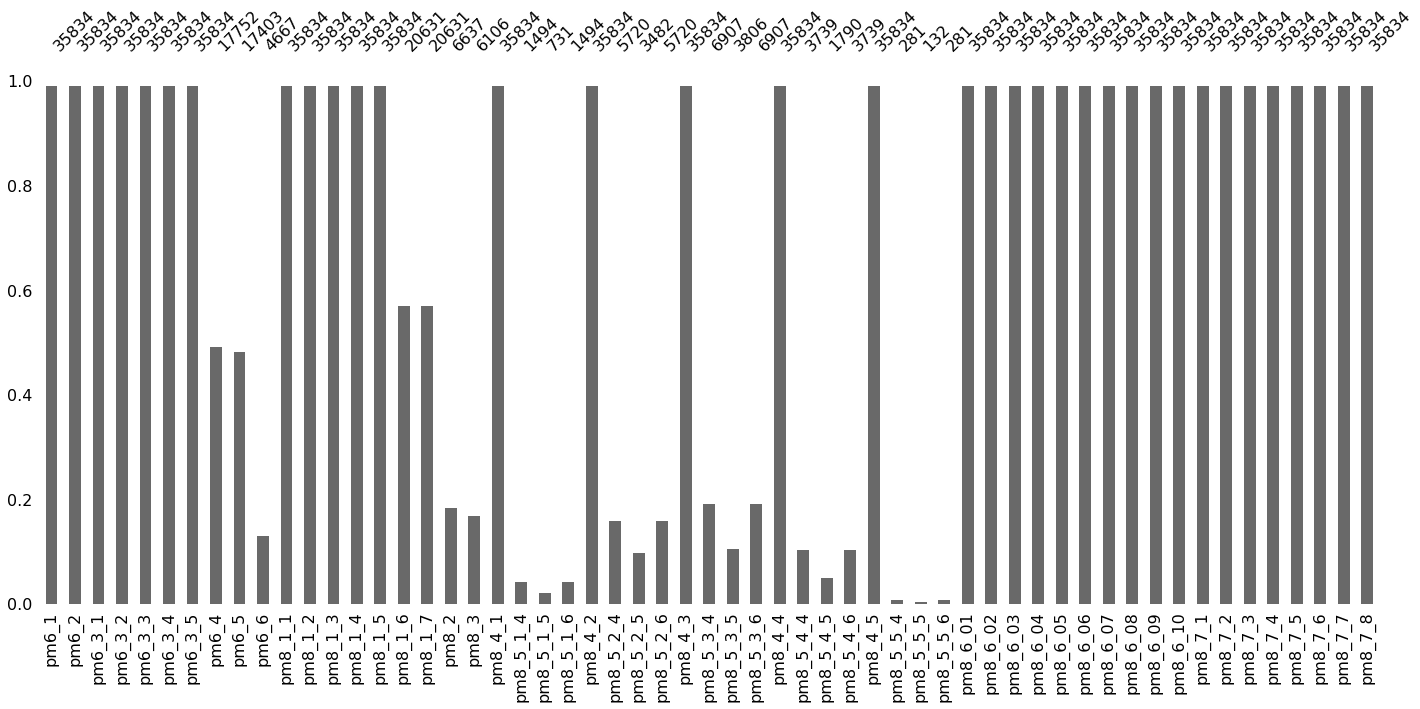

In [29]:
msno.bar(df[missing])

In [123]:
df_copy = df.copy()

In [124]:
df_copy.fillna(value=-1, inplace=True)

In [127]:
threshold = round(df_copy.shape[0]*.8)
threshold

28954

In [131]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, 'd e l e t e d')
            l.append(column)

pm6_1 :  35834  -  28954
pm6_2 :  35834  -  28954
pm6_3_1 :  35834  -  28954
pm6_3_2 :  35834  -  28954
pm6_3_3 :  35834  -  28954
pm6_3_4 :  35834  -  28954
pm6_3_5 :  35834  -  28954
pm6_4 :  17752  -  28954
pm6_4 d e l e t e d
pm6_5 :  17403  -  28954
pm6_5 d e l e t e d
pm6_6 :  4667  -  28954
pm6_6 d e l e t e d
pm8_1_1 :  35834  -  28954
pm8_1_2 :  35834  -  28954
pm8_1_3 :  35834  -  28954
pm8_1_4 :  35834  -  28954
pm8_1_5 :  35834  -  28954
pm8_1_6 :  20631  -  28954
pm8_1_6 d e l e t e d
pm8_1_7 :  20631  -  28954
pm8_1_7 d e l e t e d
pm8_2 :  6637  -  28954
pm8_2 d e l e t e d
pm8_3 :  6106  -  28954
pm8_3 d e l e t e d
pm8_4_1 :  35834  -  28954
pm8_5_1_4 :  1494  -  28954
pm8_5_1_4 d e l e t e d
pm8_5_1_5 :  731  -  28954
pm8_5_1_5 d e l e t e d
pm8_5_1_6 :  1494  -  28954
pm8_5_1_6 d e l e t e d
pm8_4_2 :  35834  -  28954
pm8_5_2_4 :  5720  -  28954
pm8_5_2_4 d e l e t e d
pm8_5_2_5 :  3482  -  28954
pm8_5_2_5 d e l e t e d
pm8_5_2_6 :  5720  -  28954
pm8_5_2_6 d e l e t

In [132]:
len(l)

22

In [133]:
l

['pm6_4',
 'pm6_5',
 'pm6_6',
 'pm8_1_6',
 'pm8_1_7',
 'pm8_2',
 'pm8_3',
 'pm8_5_1_4',
 'pm8_5_1_5',
 'pm8_5_1_6',
 'pm8_5_2_4',
 'pm8_5_2_5',
 'pm8_5_2_6',
 'pm8_5_3_4',
 'pm8_5_3_5',
 'pm8_5_3_6',
 'pm8_5_4_4',
 'pm8_5_4_5',
 'pm8_5_4_6',
 'pm8_5_5_4',
 'pm8_5_5_5',
 'pm8_5_5_6']

In [134]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [135]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

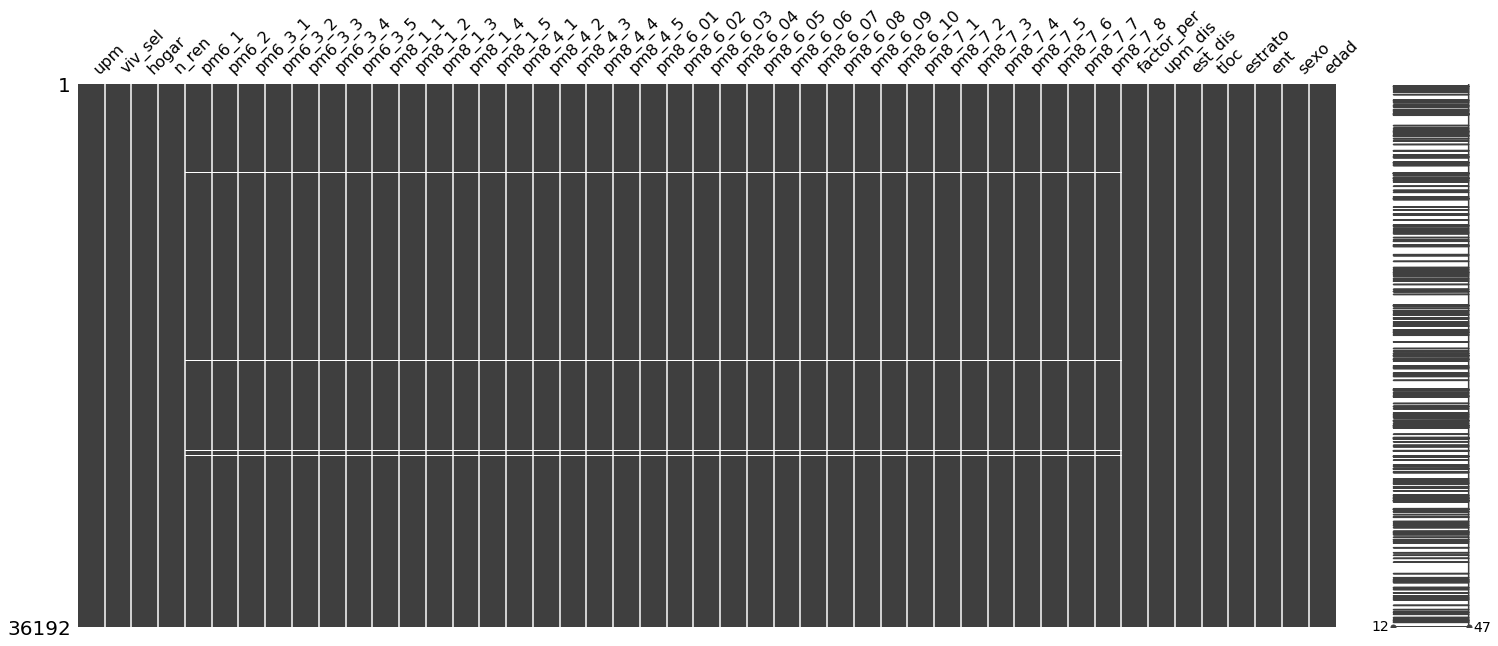

In [140]:
msno.matrix(df_copy)

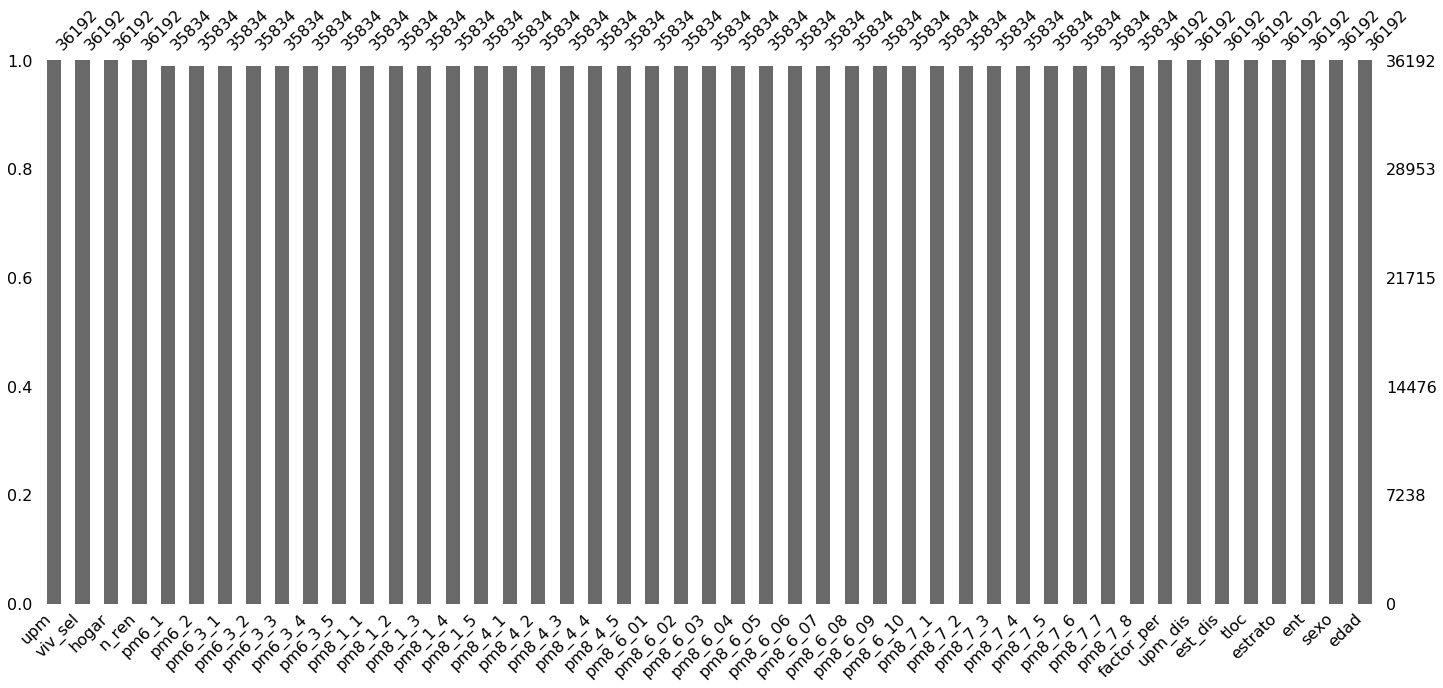

In [141]:
msno.bar(df_copy)

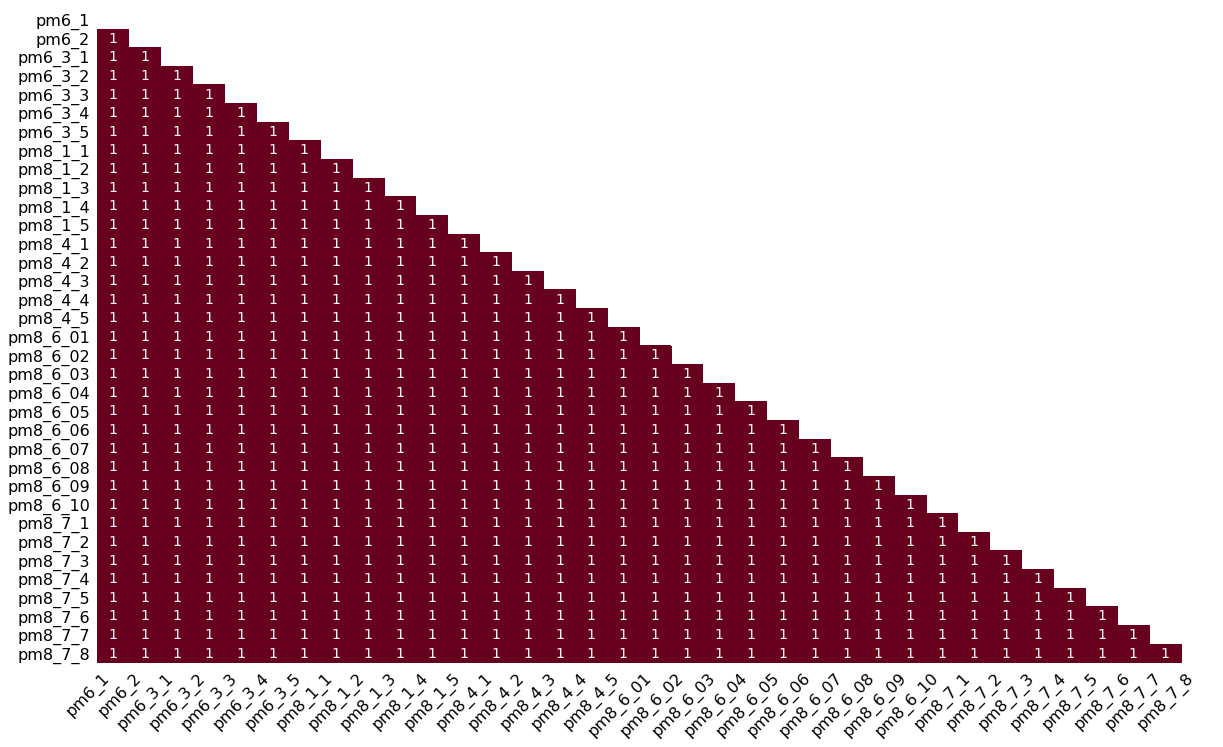

In [142]:
msno.heatmap(df_copy)

In [143]:
df_copy.to_csv('../dataframes/tadolescente_enadis_2017.csv')